In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 98%!important}</style>"))

In [2]:
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from utilities import *

## Import Data

In [3]:
pin = read_pin('../Data/pin.csv')
test_pin = read_pin('../Data/testPin.csv')
ble = read_ble('../Data/ble.csv')

In [4]:
data_1 = read_data('../Data/rssi5.csv')
data_2 = read_data('../Data/rssi_2.csv')

All beacons: ['0117C55D14E4']
Selecting all
All beacons: ['0117C55D14E4']
Selecting all


In [5]:
test_1 = read_data('../Data/testRssi.csv')
test_2 = read_data('../Data/testRssi_2.csv')

All beacons: ['0117C55D14E4']
Selecting all
All beacons: ['0117C55D14E4']
Selecting all


In [6]:
data = pd.concat([data_1, data_2], axis=0)
test = pd.concat([test_1, test_2], axis=0)

In [7]:
data.shape

(113370, 19)

In [8]:
data

,time,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,2019-12-02 01:05:32.956,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-02 01:05:32.976,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,NaN,NaN,NaN
2,2019-12-02 01:05:33.015,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-02 01:05:33.034,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.0,NaN,NaN,NaN,NaN
4,2019-12-02 01:05:33.096,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-68.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63702,2020-01-09 09:24:45.530,V1_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.0,NaN
63703,2020-01-09 09:24:45.641,V1_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63704,2020-01-09 09:24:45.642,V1_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-75.0,NaN,-83.0,NaN,NaN,NaN,NaN,NaN,NaN
63705,2020-01-09 09:24:45.667,V1_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
test.shape

(27229, 19)

In [10]:
data = data.set_index('time').groupby([pd.Grouper('location'), pd.Grouper(freq='100ms')]).mean().reset_index()
test = test.set_index('time').groupby([pd.Grouper('location'), pd.Grouper(freq='100ms')]).mean().reset_index()

In [11]:
def plot(data, loc, scanner, scatter=False):
    y = data[data['location'] == loc][scanner]
    x = np.arange(y.size)
    plt.title("Location: {}\nScanner: {}\nNaN: {}/{}".format(loc, scanner, y.isna().sum(), y.size))
    if scatter:
        plt.scatter(x, y)
    else:
        plt.plot(x, y)

In [12]:
def matrix_plot(data, i, I, j, J, scatter=False):
    locations = data['location'].unique()
    
    plt.figure(figsize=(40, 40))
    L = I - i
    S = J - j
    for x in range(i, I):
        for y in range(j, J):
            plt.subplot(L, S, (x - i) * S + (y - j) + 1)
            plot(data, locations[x], scanners[y], scatter)

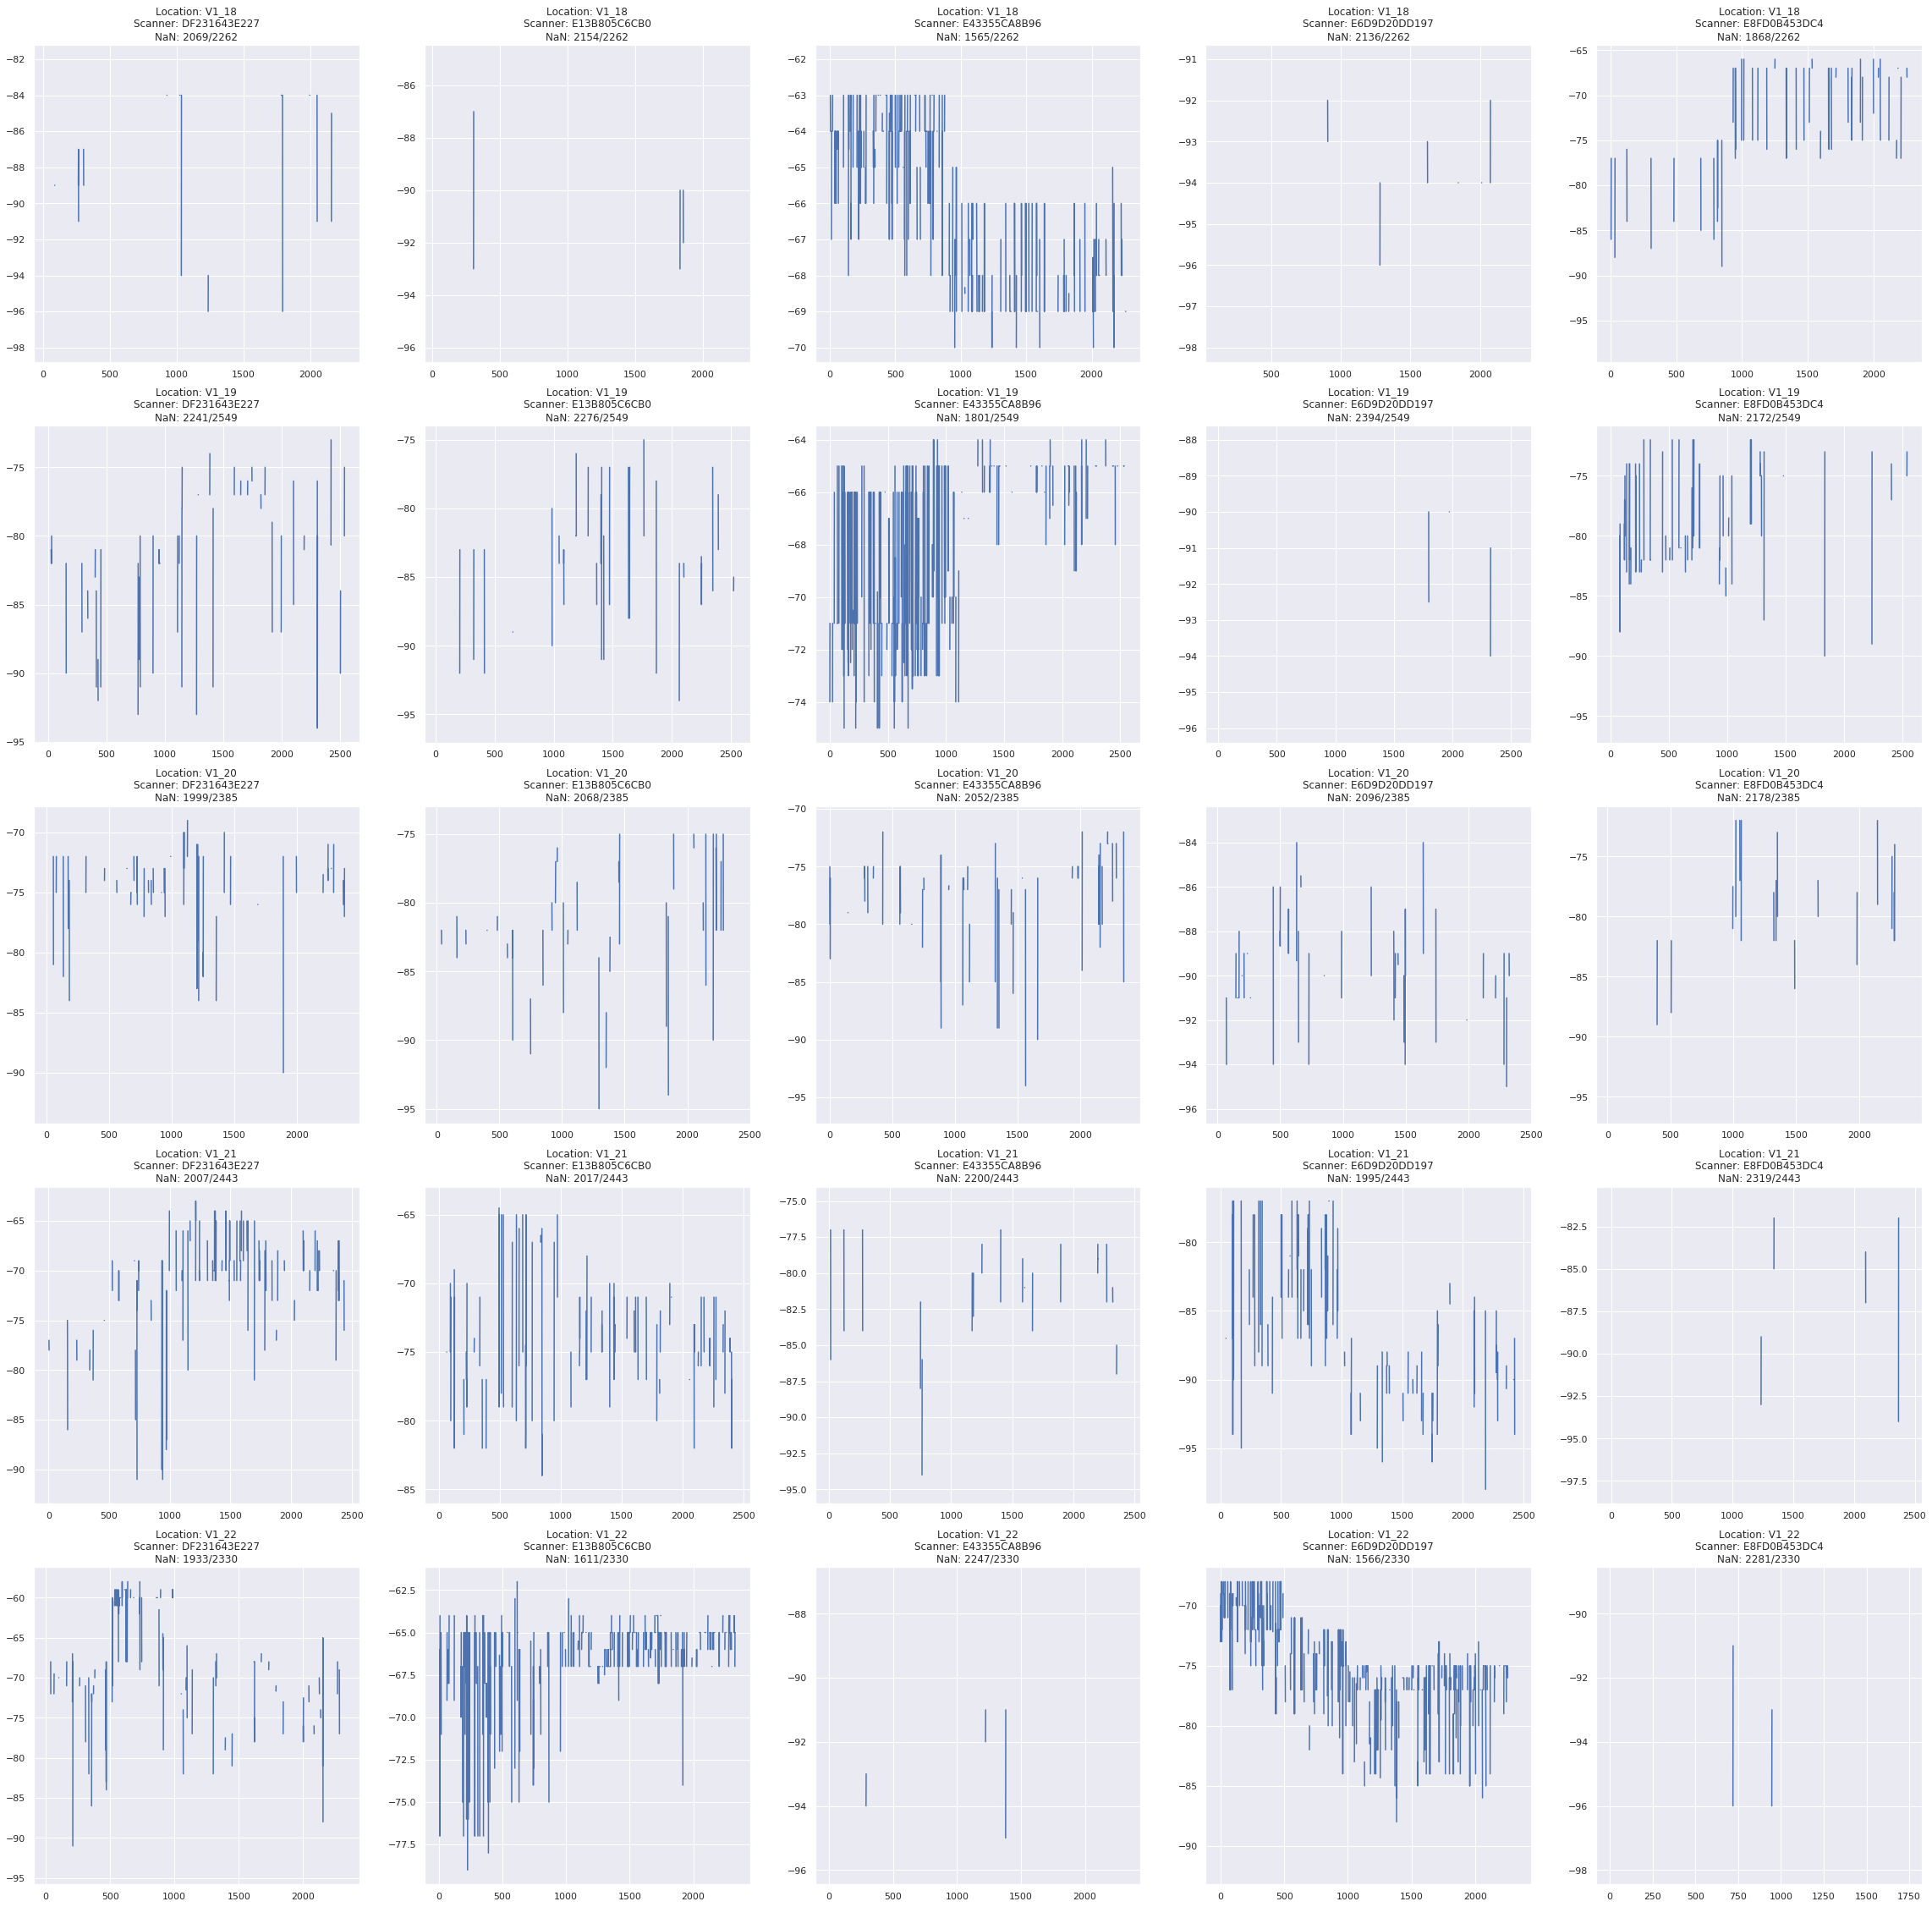

In [13]:
matrix_plot(data, 5, 10, 5, 10)

In [14]:
for norm in ['l1', 'l2', 'max']:
    data_normalized = data.copy()
    data_normalized[scanners] = normalize(data[scanners].fillna(-100) + 100, norm=norm)
    std = data_normalized.groupby('location')[scanners].std()
    print("{} standard deviation: {}".format(norm, std.mean().mean()))

l1 standard deviation: 0.16320637068912655
l2 standard deviation: 0.20264638027154097
max standard deviation: 0.25358663402629245


In [15]:
data_normalized = data.copy()
test_normalized = test.copy()

data_normalized[scanners] = normalize(data[scanners].fillna(-100) + 100, norm='l1')
test_normalized[scanners] = normalize(test[scanners].fillna(-100) + 100, norm='l1')

In [16]:
data_normalized.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000,50776.000000
mean,0.053917,0.050587,0.040938,0.063318,0.052922,0.066720,0.067468,0.060375,0.099916,0.034665,0.063815,0.056519,0.076787,0.063477,0.064822,0.032480,0.051275
std,0.169499,0.164119,0.149304,0.182681,0.167875,0.193579,0.195324,0.181085,0.243346,0.139056,0.189691,0.173841,0.201303,0.189573,0.193092,0.136904,0.165128
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
test_normalized.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000
mean,0.057371,0.053715,0.043815,0.056030,0.063266,0.085258,0.064347,0.055848,0.070764,0.040078,0.072301,0.059041,0.067157,0.060936,0.058124,0.037513,0.054438
std,0.176741,0.166277,0.151020,0.171034,0.181699,0.213005,0.182068,0.172414,0.196449,0.151196,0.197184,0.171483,0.183112,0.186871,0.180917,0.143014,0.172436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


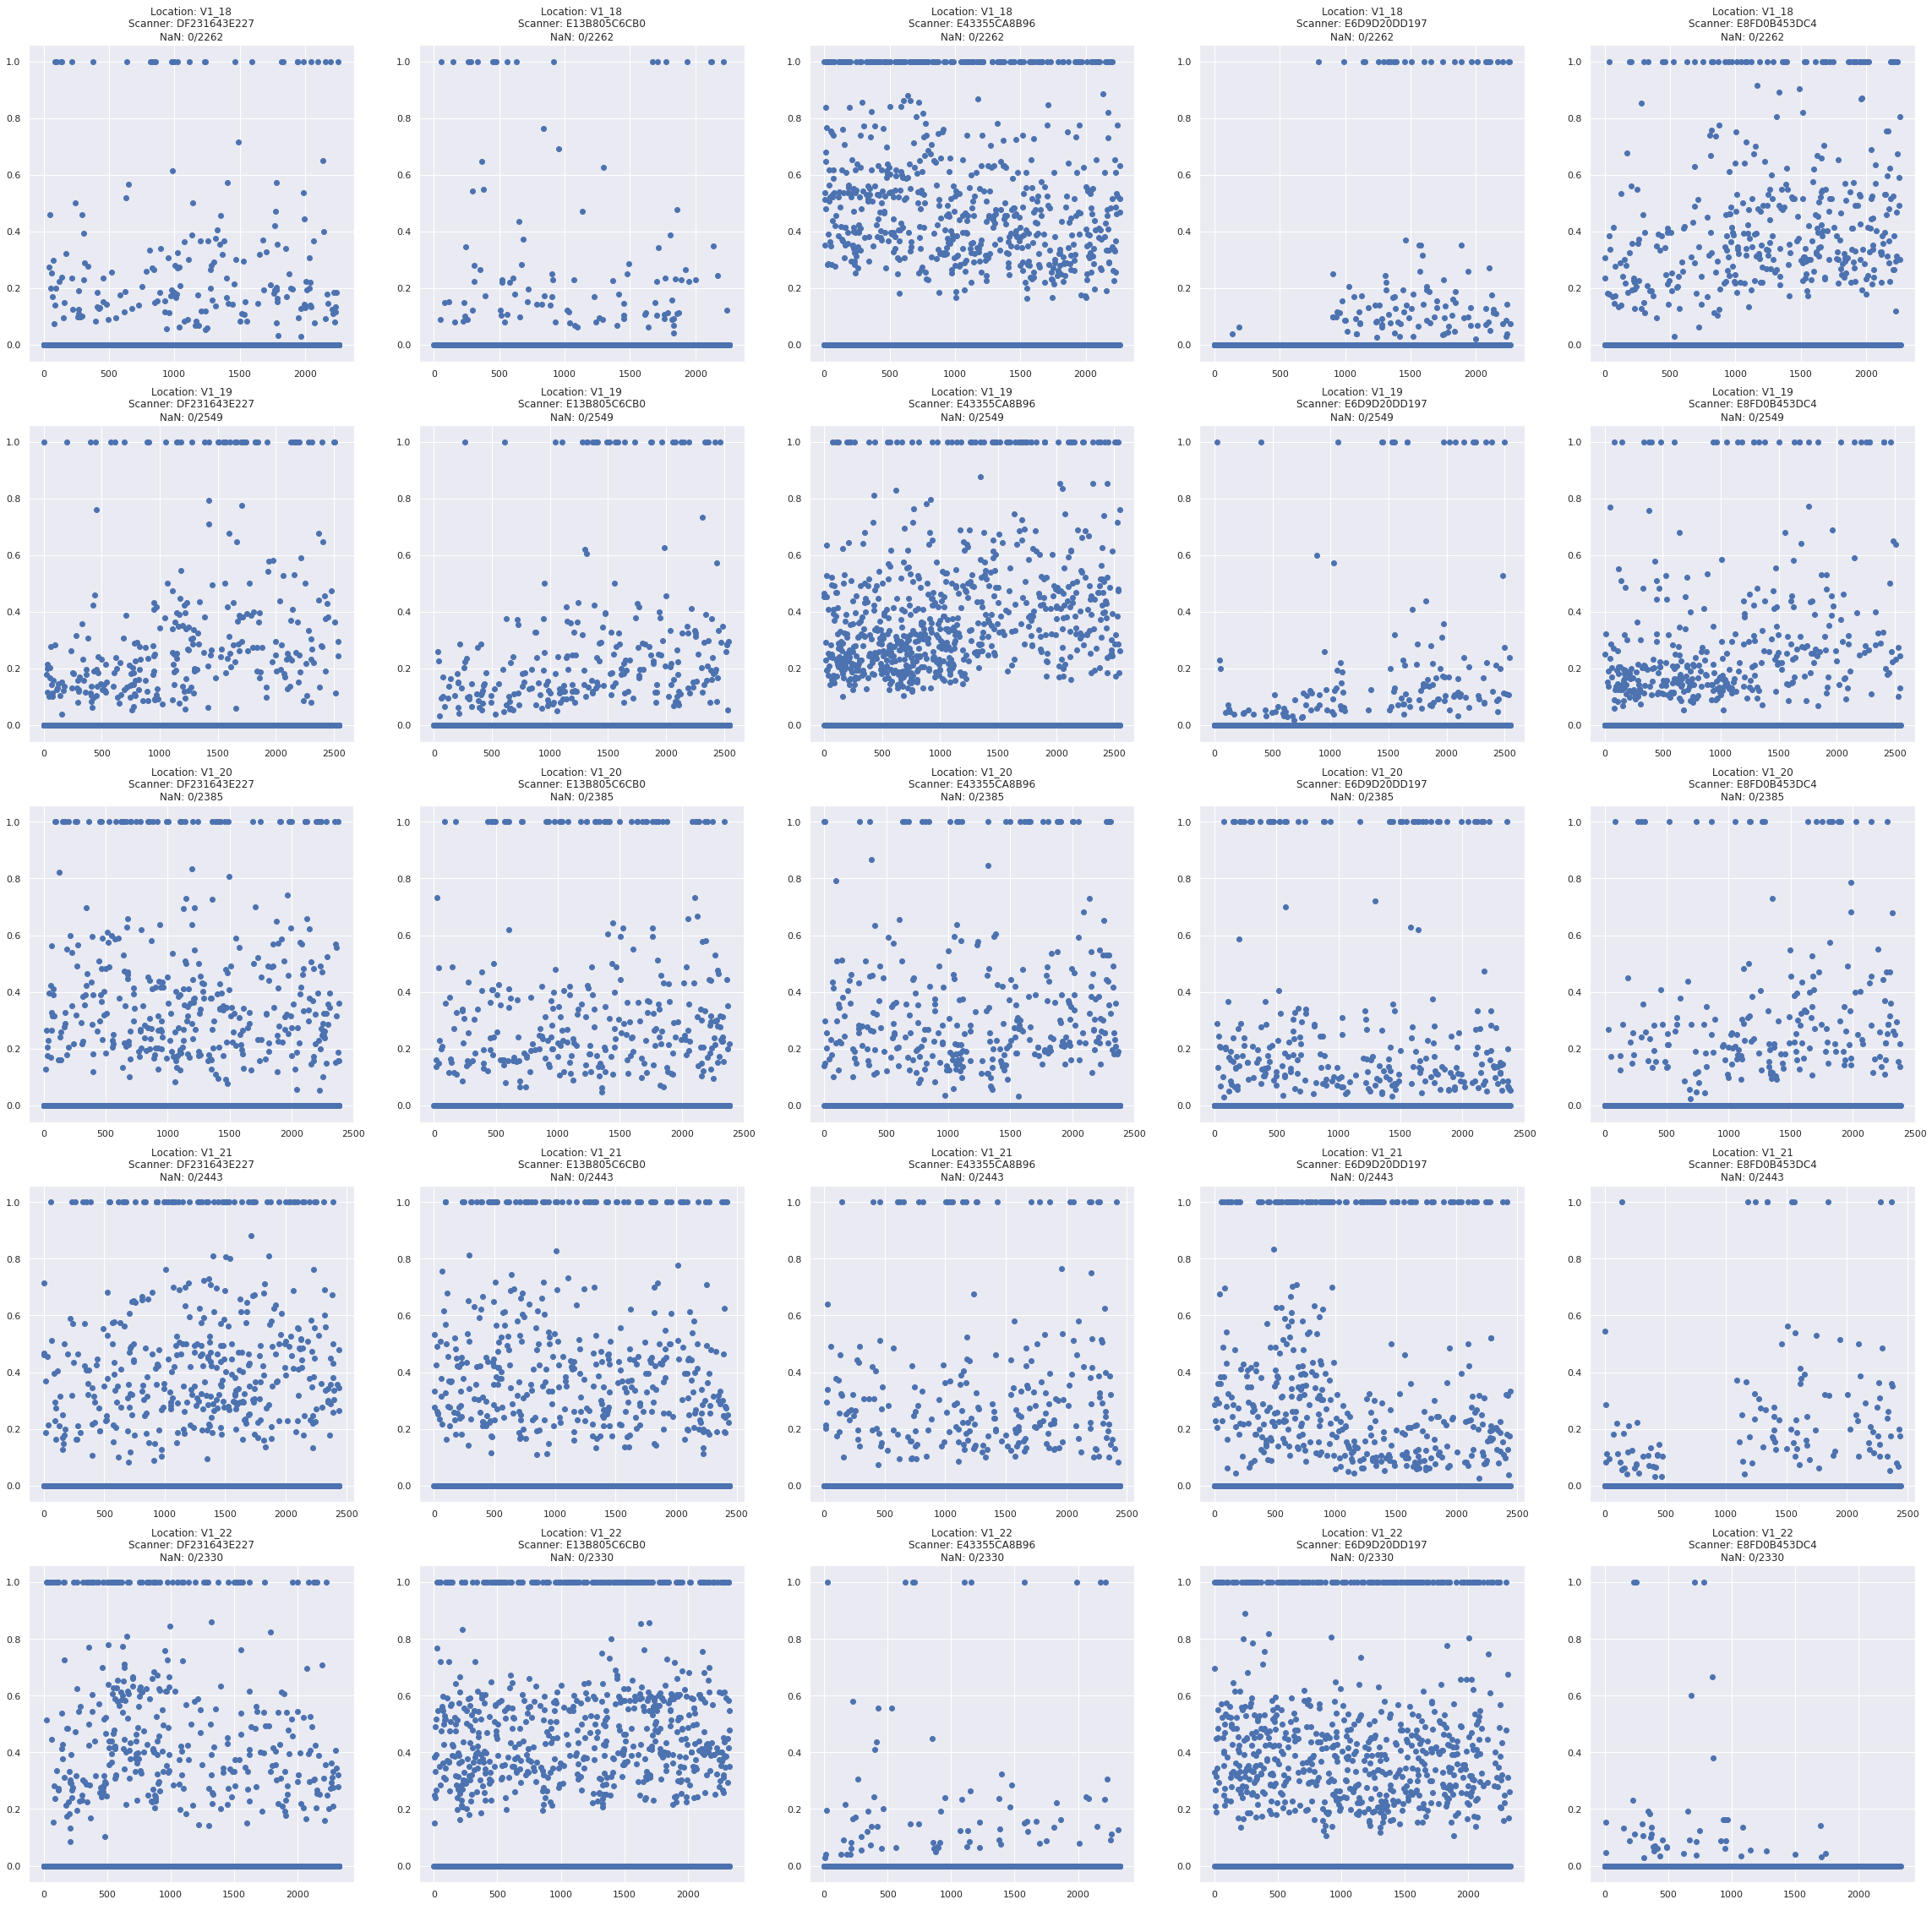

In [18]:
matrix_plot(data_normalized, 5, 10, 5, 10, scatter=True)

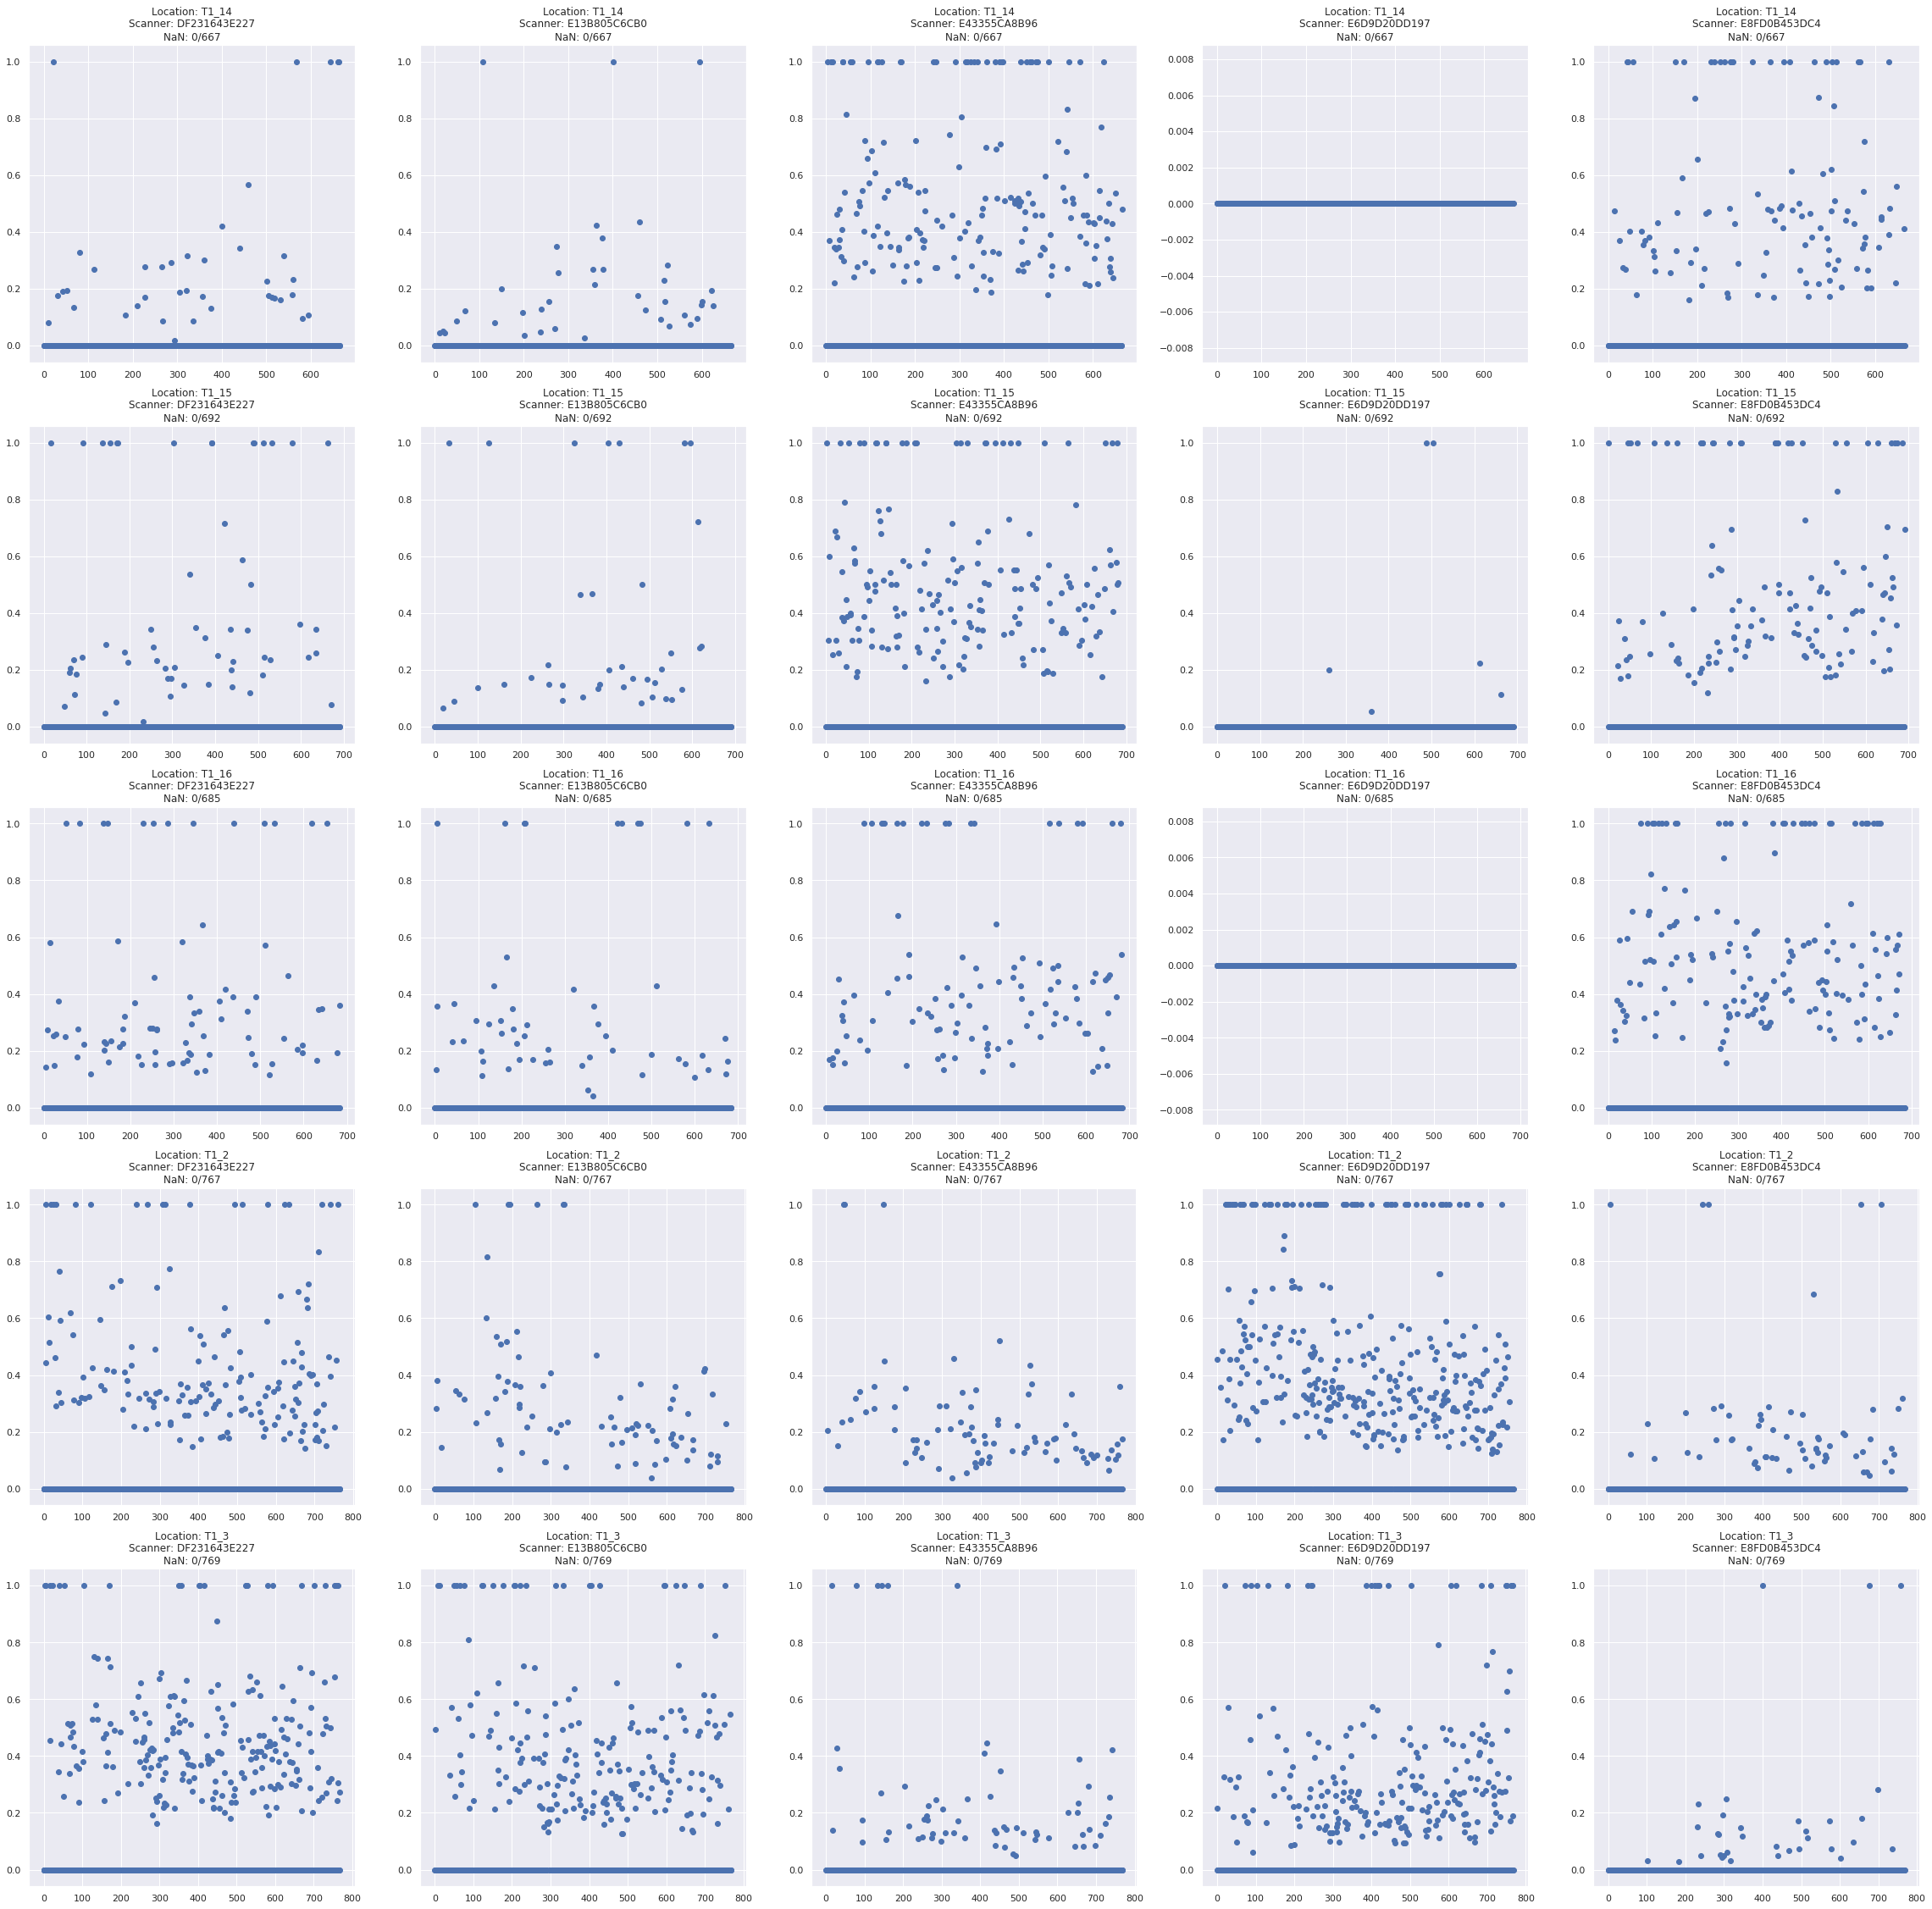

In [19]:
matrix_plot(test_normalized, 5, 10, 5, 10, scatter=True)

In [20]:
for norm in ['l1', 'l2', 'max']:
    data_rolled = data.groupby('location')[scanners].rolling(10, min_periods=1).mean().reset_index()
    data_rolled[scanners] = data_rolled.groupby('location')[scanners].ffill()
    test_rolled = test.groupby('location')[scanners].rolling(10, min_periods=1).mean().reset_index()
    test_rolled[scanners] = test_rolled.groupby('location')[scanners].ffill()

    data_rnormalized = data_rolled.copy()
    test_rnormalized = test_rolled.copy()

    data_rnormalized[scanners] = normalize(data_rolled[scanners].fillna(-100) + 100, norm=norm)
    test_rnormalized[scanners] = normalize(test_rolled[scanners].fillna(-100) + 100, norm=norm)
    
    std = data_rnormalized.groupby('location')[scanners].std()
    print("{} standard deviation: {}".format(norm, std.mean().mean()))

l1 standard deviation: 0.011517548655001398
l2 standard deviation: 0.040050376122786495
max standard deviation: 0.10497333452358579


In [21]:
data_rolled = data.groupby('location')[scanners].rolling(10, min_periods=1).mean().reset_index()
data_rolled[scanners] = data_rolled.groupby('location')[scanners].ffill()
test_rolled = test.groupby('location')[scanners].rolling(10, min_periods=1).mean().reset_index()
test_rolled[scanners] = test_rolled.groupby('location')[scanners].ffill()

data_rnormalized = data_rolled.copy()
test_rnormalized = test_rolled.copy()

data_rnormalized[scanners] = normalize(data_rolled[scanners].fillna(-100) + 100, norm='l1')
test_rnormalized[scanners] = normalize(test_rolled[scanners].fillna(-100) + 100, norm='l1')

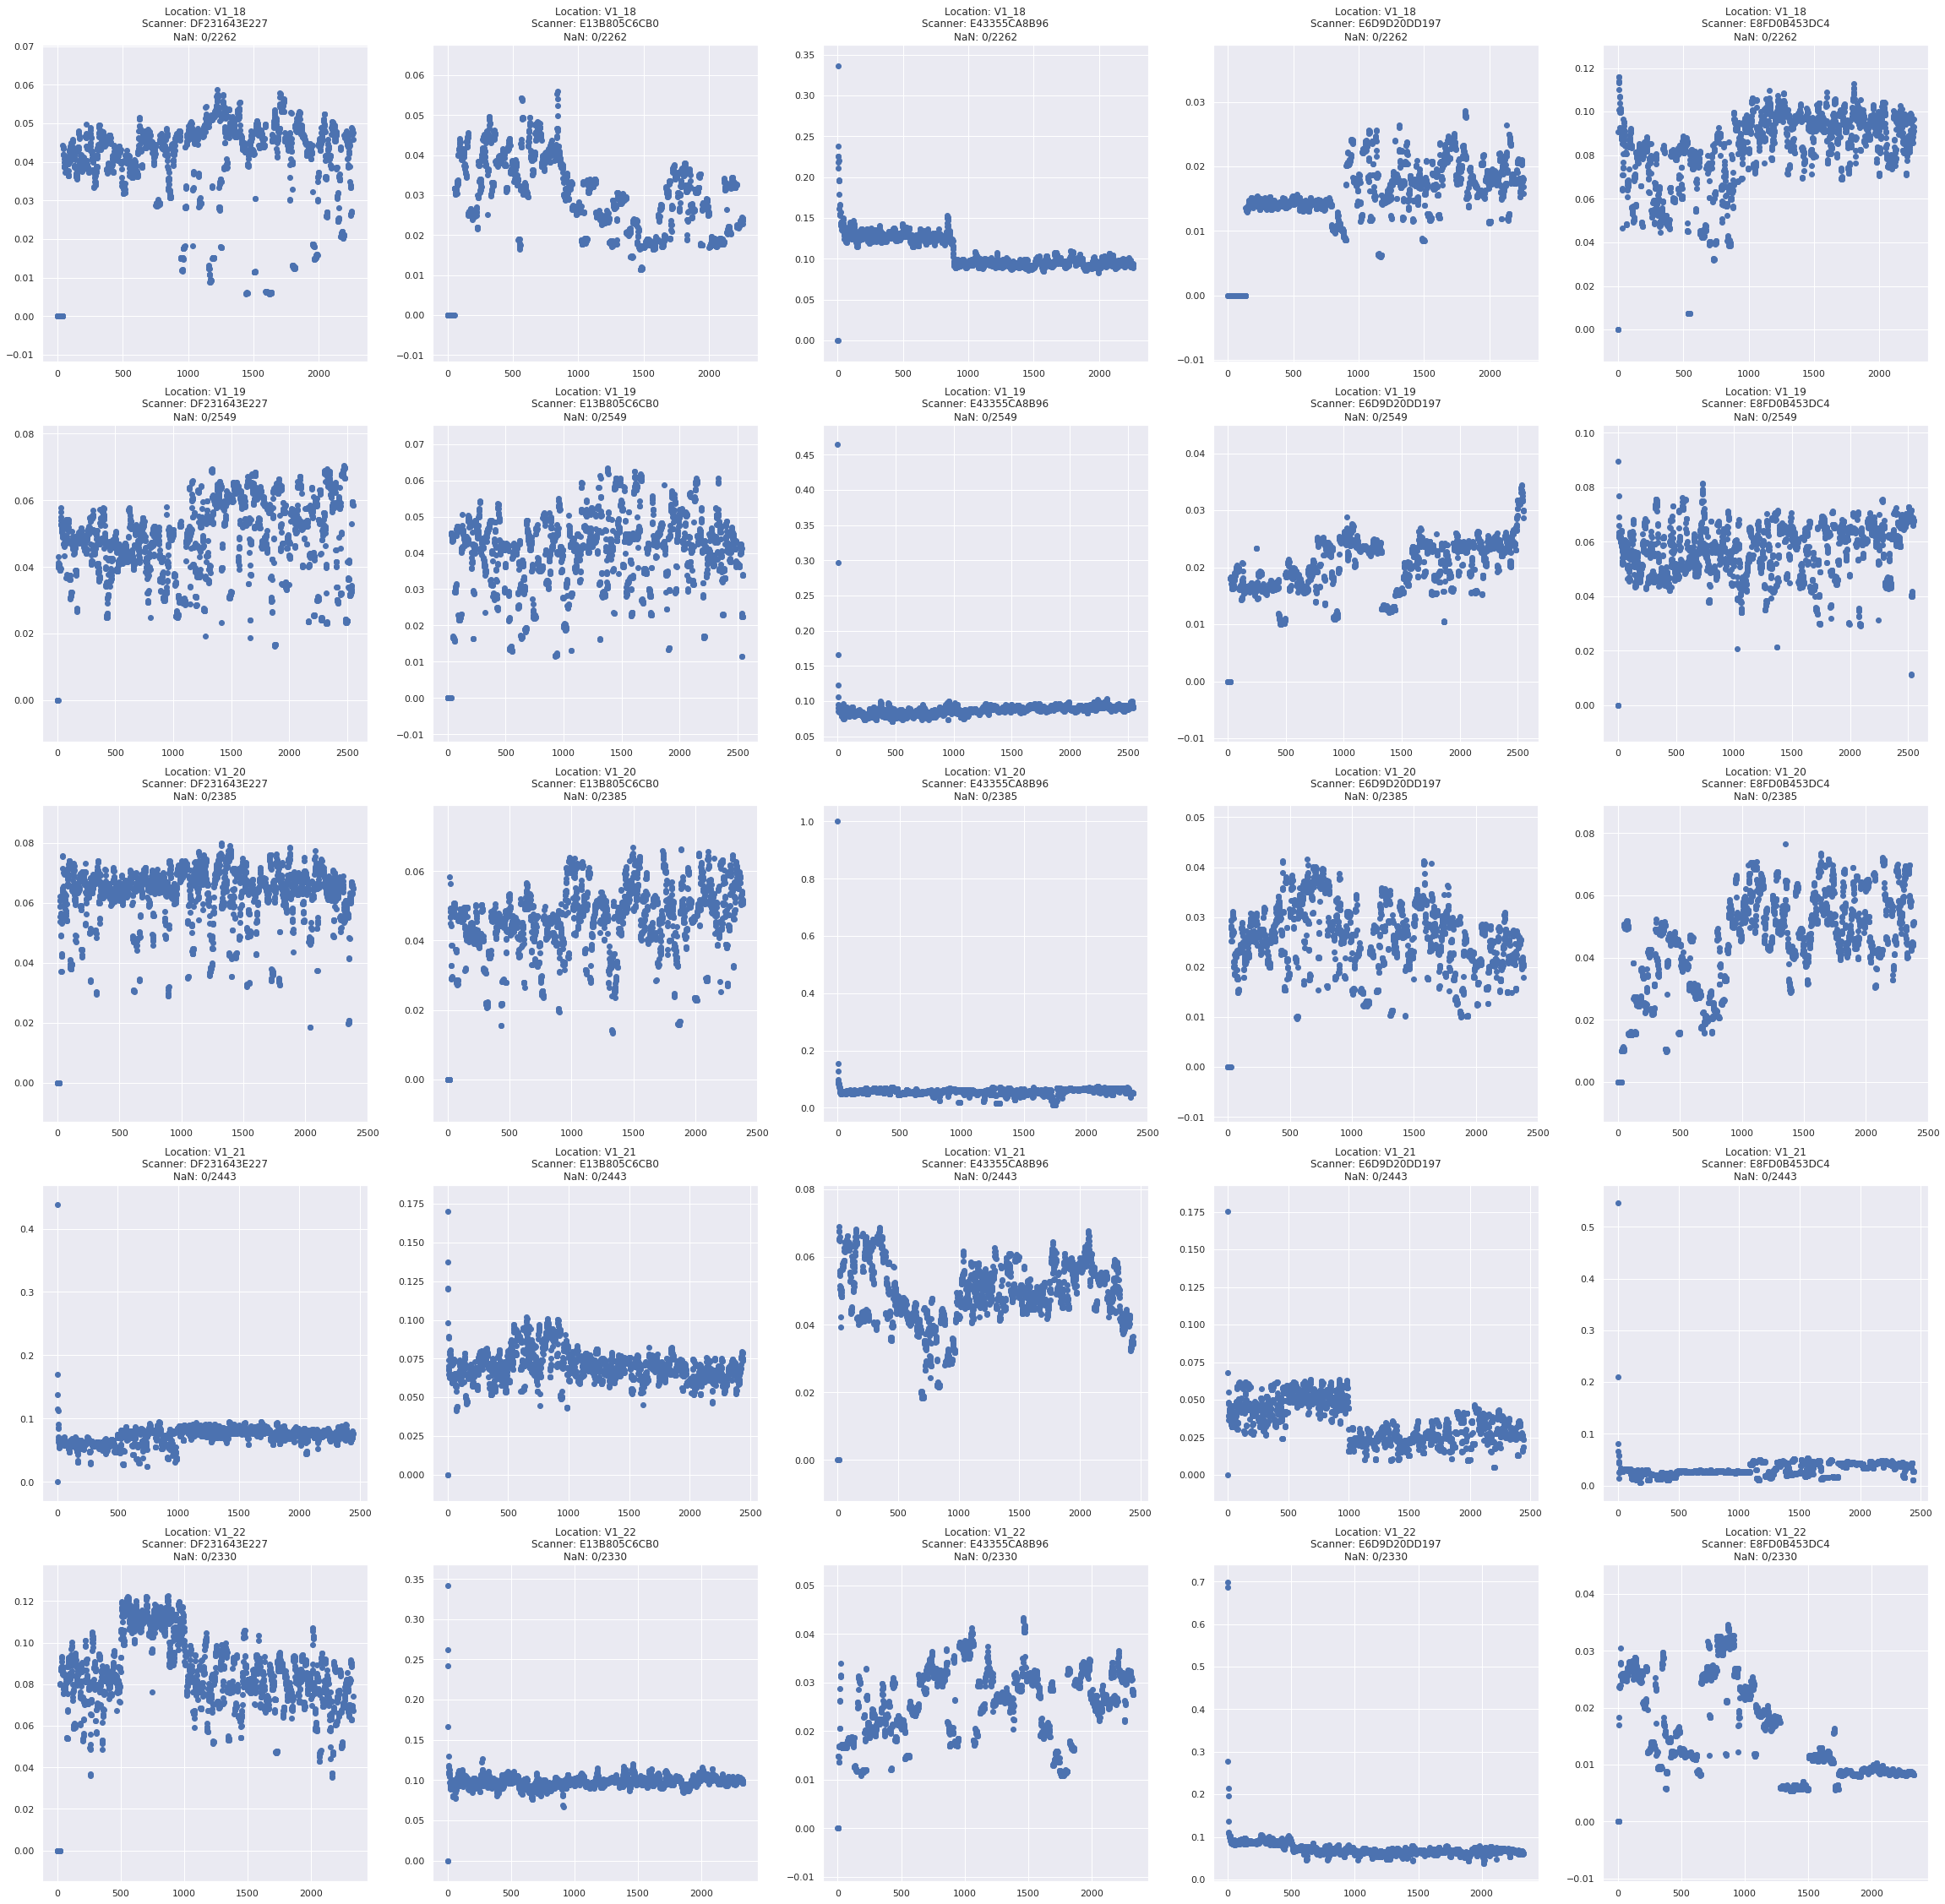

In [22]:
matrix_plot(data_rnormalized, 5, 10, 5, 10, scatter=True)

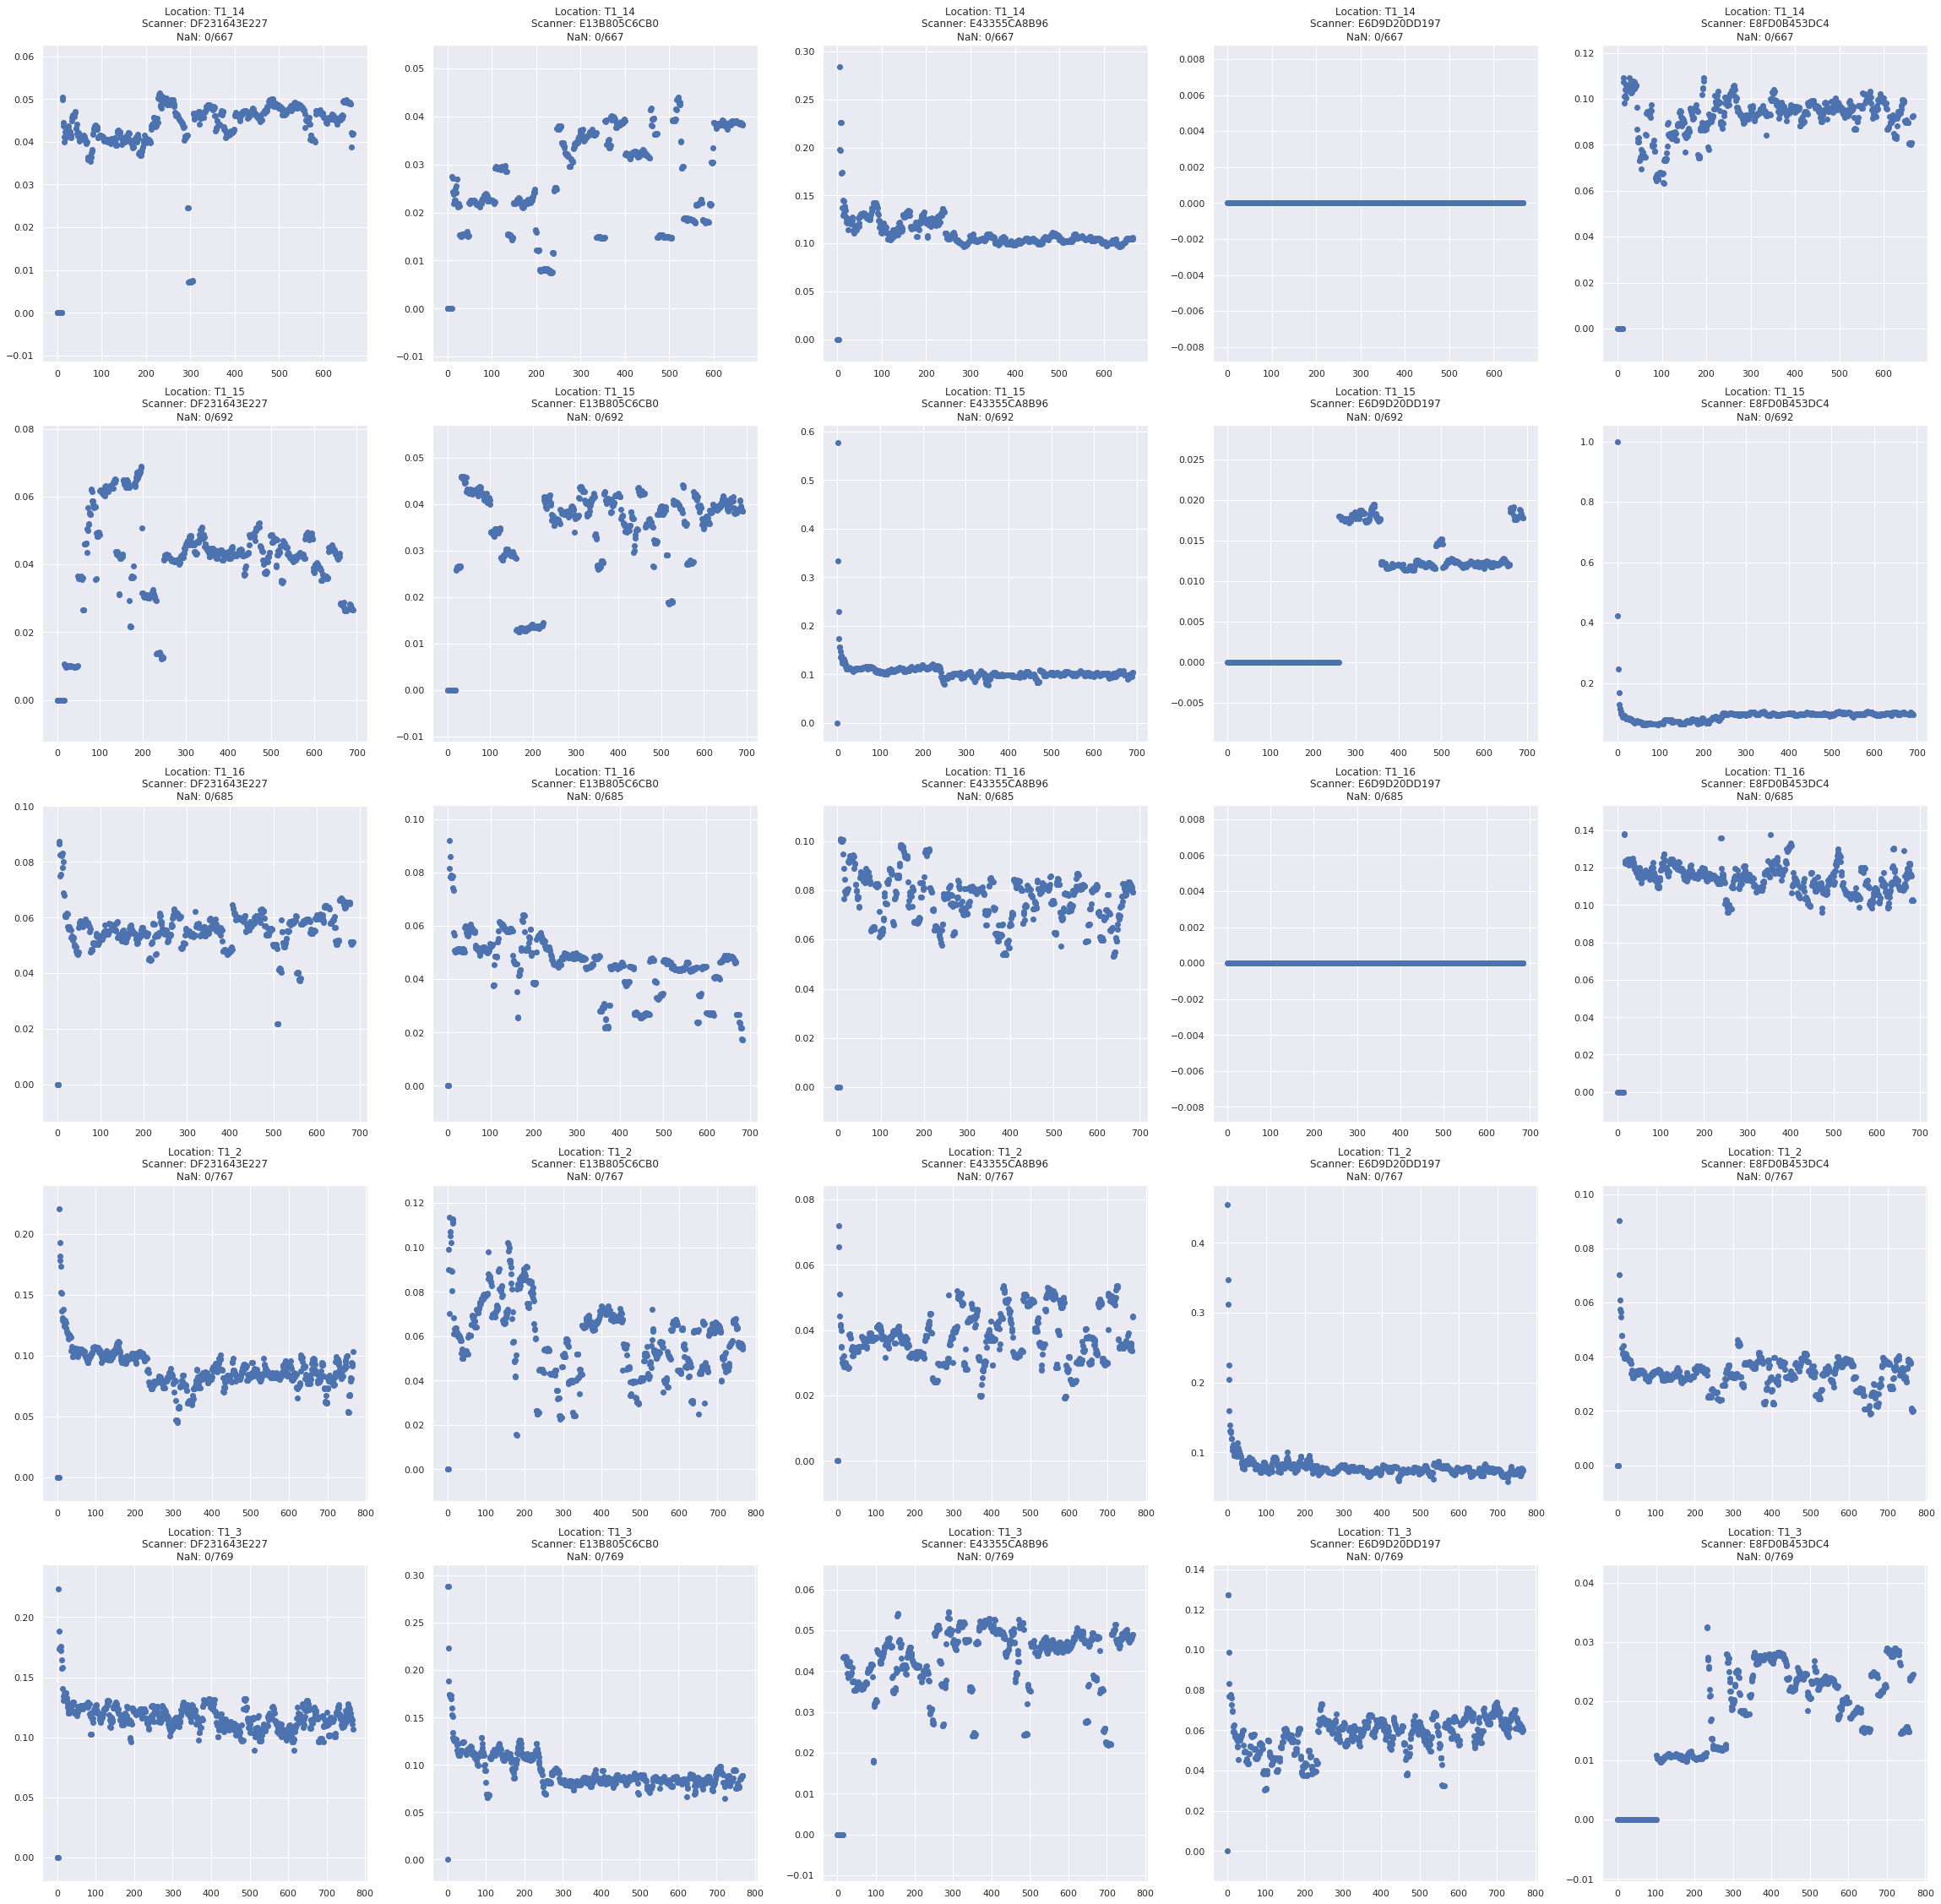

In [23]:
matrix_plot(test_rnormalized, 5, 10, 5, 10, scatter=True)